In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cause_death = pd.read_csv('cause_of_deaths.csv')
cause_death.head()

,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,...,2108,3709,338,2054,4154,5945,2673,5005,323,2985
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,...,2120,3724,351,2119,4472,6050,2728,5120,332,3092
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,...,2153,3776,386,2404,5106,6223,2830,5335,360,3325
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,...,2195,3862,425,2797,5681,6445,2943,5568,396,3601
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,...,2231,3932,451,3038,6001,6664,3027,5739,420,3816


In [3]:
#what countries are given 
ctries_terr = cause_death['Country/Territory'].unique()
print(len(ctries_terr))
#print(ctries_terr)

204


In [4]:
#list of all columns 
columns = cause_death.columns
print(len(columns))
#print(columns)

34


In [5]:
years = cause_death['Year'].unique()
print(len(years))
#print(years)

30


In [6]:
#does every country have every year ? yes
cnt_terr_count = cause_death.groupby('Country/Territory').count()

#if count is less than 30 in any of the columns that means it is missing 
cnt_terr_count[(cnt_terr_count['Year'] != 30)] #no rows return so all years are there


,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,Maternal Disorders,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
Country/Territory,,,,,,,,,,,,,,,,,,,,,


In [7]:
#can we group by continent first? 
countries_continents = pd.read_csv('countries_continents.csv')

del countries_continents['Unnamed: 0']
countries_continents

,Continent,Country
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin
3,Africa,Botswana
4,Africa,Burkina
...,...,...
190,South America,Peru
191,South America,Suriname
192,South America,Uruguay
193,South America,Venezuela


In [8]:
#add a col in for continent

for index, row in cause_death.iterrows():

    country = cause_death.loc[index, 'Country/Territory'] 
    #find this country in the count cont file
    
    row_cont = countries_continents.loc[countries_continents['Country'] == country]
    try: 
        cause_death.loc[index, 'Continent'] = row_cont['Continent'].iat[0]
    #leaving out territories for now !
    except IndexError:
        pass
    
    

cause_death

,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis,Continent
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,...,3709,338,2054,4154,5945,2673,5005,323,2985,Asia
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,...,3724,351,2119,4472,6050,2728,5120,332,3092,Asia
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,...,3776,386,2404,5106,6223,2830,5335,360,3325,Asia
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,...,3862,425,2797,5681,6445,2943,5568,396,3601,Asia
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,...,3932,451,3038,6001,6664,3027,5739,420,3816,Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6115,Zimbabwe,ZWE,2015,1439,754,215,3019,2518,770,1302,...,2108,381,2990,2373,2751,1956,4202,632,146,Africa
6116,Zimbabwe,ZWE,2016,1457,767,219,3056,2050,801,1342,...,2160,393,3027,2436,2788,1962,4264,648,146,Africa
6117,Zimbabwe,ZWE,2017,1460,781,223,2990,2116,818,1363,...,2196,398,2962,2473,2818,2007,4342,654,144,Africa
6118,Zimbabwe,ZWE,2018,1450,795,227,2918,2088,825,1396,...,2240,400,2890,2509,2849,2030,4377,657,139,Africa


In [9]:
cause_death[cause_death['Year'] == 1990].groupby('Continent').count()

,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,50,50,50,50,50,50,50,50,50,50,...,50,50,50,50,50,50,50,50,50,50
Asia,39,39,39,39,39,39,39,39,39,39,...,39,39,39,39,39,39,39,39,39,39
Europe,43,43,43,43,43,43,43,43,43,43,...,43,43,43,43,43,43,43,43,43,43
North America,22,22,22,22,22,22,22,22,22,22,...,22,22,22,22,22,22,22,22,22,22
Oceania,14,14,14,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14,14,14,14
South America,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12


In [10]:
#how many continents each country has 
year_1990 = cause_death[cause_death['Year'] == 1990].groupby('Continent').sum()
year_2019 = cause_death[cause_death['Year'] == 2019].groupby('Continent').sum()

year_2019

,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,Maternal Disorders,HIV/AIDS,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,100950,132586,78137,19703,97158,483713,23981,76546,84408,615498,...,187475,154675,18321,93367,197961,199323,243840,378819,25376,16335
Asia,78741,76427,785999,182372,97098,43962,164663,117048,84242,126248,...,822577,741699,41033,66715,704104,2825574,752916,1255951,55367,59274
Europe,86817,2389,335489,70607,8658,0,10717,12518,429,10996,...,126623,137692,3902,7464,45941,302334,139768,308243,8688,418
North America,44418,2483,56803,12791,12189,463,6106,52641,3871,16503,...,109543,108865,1220,11084,36658,79319,72614,119818,2602,439
Oceania,28266,715,13891,3110,466,1016,884,1471,886,4049,...,12417,7531,234,428,4599,22014,3555,9760,908,125
South America,24228,3692,105549,20403,15441,877,10576,102513,4798,27498,...,115478,105742,965,14322,80660,144870,76038,153047,3880,379


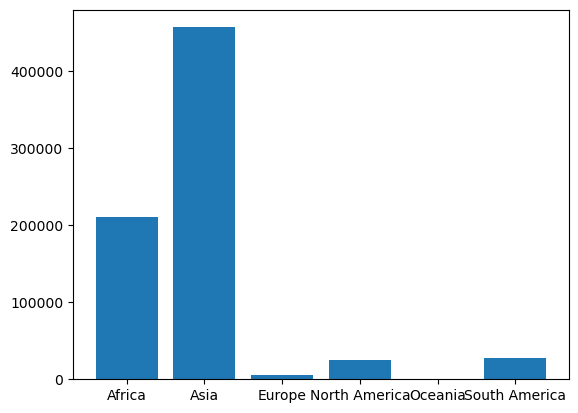

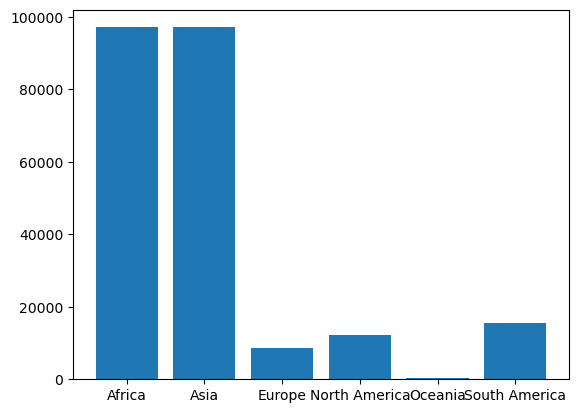

In [11]:
#plotting first year vs last year in dataset for Nutritional def in Africa 

plt.bar(year_1990.index, year_1990['Nutritional Deficiencies'])
plt.show()

plt.bar(year_2019.index, year_2019['Nutritional Deficiencies'])
plt.show()

In [12]:
continent_year = cause_death[cause_death['Year'] == 1990].groupby('Continent').count()
continent_year

,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,50,50,50,50,50,50,50,50,50,50,...,50,50,50,50,50,50,50,50,50,50
Asia,39,39,39,39,39,39,39,39,39,39,...,39,39,39,39,39,39,39,39,39,39
Europe,43,43,43,43,43,43,43,43,43,43,...,43,43,43,43,43,43,43,43,43,43
North America,22,22,22,22,22,22,22,22,22,22,...,22,22,22,22,22,22,22,22,22,22
Oceania,14,14,14,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14,14,14,14
South America,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12


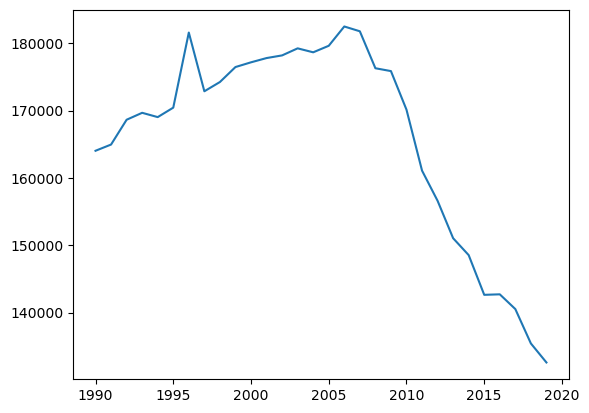

In [13]:
#i need to get all the rows in the df that have 'Africa' in them 
africa = cause_death[cause_death['Continent'] == 'Africa']
year_africa = africa.groupby('Year').sum()
year_africa.head()

plt.plot(year_africa.index, year_africa['Meningitis'])

Text(0, 0.5, 'Meningitis Cases')

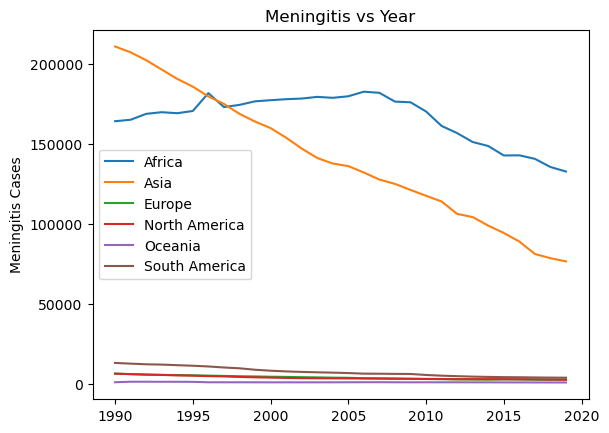

In [14]:
#repeat for all the continents 

for continent in continent_year.index:
    #print(continent)
    cause_continent = cause_death[cause_death['Continent'] == continent]
    year_continent = cause_continent.groupby('Year').sum()
    plt.plot(year_continent.index, year_continent['Meningitis'])
    
    
plt.legend(continent_year.index)
plt.title('Meningitis vs Year')
plt.ylabel('Meningitis Cases')


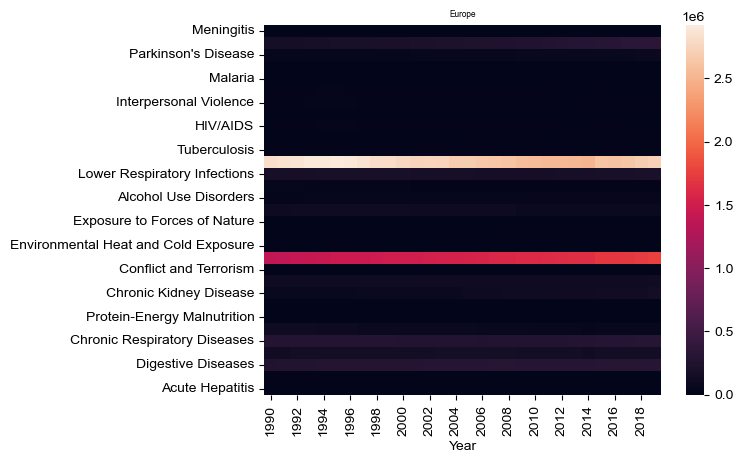

In [17]:
#create for loop instead of re-doing it everytime
def heat_map(continent):
    cont_gen = cause_death[cause_death['Continent'] == 'Europe']
    year_cont_gen = cont_gen.groupby('Year').sum()
    year_cont_gen.head()

    columns = cause_death.columns
    diseases = columns.tolist()
    diseases = diseases[2:-1]
    diseases

    color_map = cont_gen[diseases].groupby('Year').sum()
    color_map = color_map.loc[year_cont_gen.index.tolist()]
    color_map = color_map.T
    color_map

    ax = sns.heatmap(color_map)
    sns.set(font_scale=0.5)
    plt.title(continent)

    
heat_map('Europe')

In [18]:
north_america = cause_death[cause_death['Continent'] == 'North America']
year_north_america = north_america.groupby('Year').sum()
year_north_america.head()


,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,Maternal Disorders,HIV/AIDS,Drug Use Disorders,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
Year,,,,,,,,,,,,,,,,,,,,,
1990,6266,18446,4292,24490,541,8859,29958,5131,7303,891,...,42043,21656,1794,21637,35252,37353,37241,64559,3459,591
1991,5951,19101,4443,24065,1785,8631,30789,4991,9669,957,...,43413,22658,1714,21318,35018,38117,38148,65676,3362,583
1992,5670,19827,4633,23438,1179,8470,31465,5185,12446,1022,...,45382,23973,1661,20774,34987,39281,39358,67288,3253,572
1993,5452,20612,4859,22759,1429,8320,31696,4764,15396,1125,...,47678,25476,1614,20143,35020,40781,40910,69258,3176,561
1994,5153,21428,5064,21791,1623,8058,32610,5012,17964,1185,...,49604,26932,1544,19286,34692,41870,41935,70419,3057,552


In [19]:
#we know that 2010, Exposures to Forces of Nature had a spike - find which country/countries were causes it:
#this was the 2010 Haiti earthquake 

#query for north america 2010
na_outlier = cause_death[cause_death['Continent'] == 'North America']
na_outlier = na_outlier[na_outlier['Year'] == 2010]

#sort by value of outlier var 
na_outlier = na_outlier.sort_values('Exposure to Forces of Nature', ascending = False)

na_outlier[['Country/Territory', 'Exposure to Forces of Nature']].head()

,Country/Territory,Exposure to Forces of Nature
2330,Haiti,222641
3410,Mexico,206
2210,Guatemala,177
2360,Honduras,144
3830,Nicaragua,77


In [1]:
#we know that 1994, Conflict and Terrorism had a spike - find which country/countries were causes it:

#query for Africa 1994
na_outlier = cause_death[cause_death['Continent'] == 'Africa']
na_outlier = na_outlier[na_outlier['Year'] == 1994]

#sort by value of outlier var 
na_outlier = na_outlier.sort_values('Conflict and Terrorism', ascending = False)

na_outlier[['Country/Territory', 'Conflict and Terrorism']].head()

NameError: name 'cause_death' is not defined

In [2]:
print('hello')

hello
